****
# JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. [Find the 10 countries with most projects](#Exercise-1)
2. [Find the top 10 major project themes (using column 'mjtheme_namecode')](#Exercise-2)
3. [In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.](#Exercise-3)

## Imports

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

****
## Exercise 1
### Find the 10 countries with most projects

#### Solution -- see below for detail on steps taken and decisions made

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Republic of Mozambique             12
People's Republic of Bangladesh    12
Nepal                              12
United Republic of Tanzania        10
Name: countryname, dtype: int64


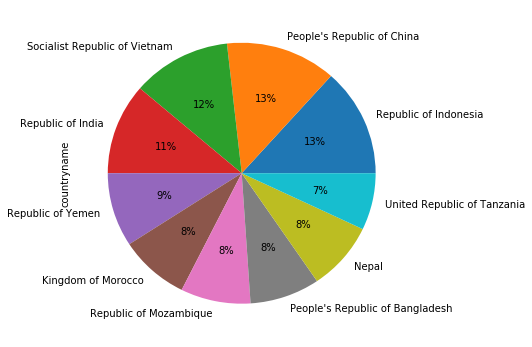

In [2]:
# load json as string and normalize
a = json.load(open('data/world_bank_projects.json'))
a = json_normalize(a)

# make a copy of the dataframe, since we'll be overwriting some values
b = a.copy()

# update country name values that are relevant to the final answer
# see "Steps to Solution" below for further detail
b.loc[(b.countryname == 'Africa') & (b.borrower == 'TANZANIA'), 'countryname'] = 'United Republic of Tanzania'
b.loc[(b.countryname == 'Africa') & (b.borrower == 'BURUNDI,RWANDA,TANZANIA'), 'countryname'] = 'United Republic of Tanzania'
b.loc[(b.countryname == 'Africa') & (b.borrower == 'MALAWI, MOZAMBIQUE, ZAMBIA'), 'countryname'] = 'Republic of Mozambique'

# Take the top ten countries
ans1 = b.countryname.value_counts().head(10)
print(ans1)
ans1.plot(kind='pie', figsize=(6,6), autopct='%.f%%')

****
#### Steps to Solution - if you'd like to see the steps taken, start here; otherwise skip to [Exercise 2](#Exercise-2) below

The first task is to load the data as a dataframe and inspect it using .info(), .columns(), etc. We note that the countryname column contains 500 non-null values, and glancing at a.countryname.head() and .tail() show the data looks pretty clean.

In [3]:
# load json as string and normalize
a = json.load(open('data/world_bank_projects.json'))
a = json_normalize(a)

# Review dataframe using basic summary functions
print(a.info())
#print(a.columns)
#print(a.describe()) 
#print(a.head())
print(a.countryname.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 55 columns):
_id.$oid                    500 non-null object
approvalfy                  500 non-null object
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 no

***
The next thing is to do the obvious and take value_counts() by country name.  

Note below that 'Africa' is listed as the tenth-ranked country; but it's a continent, not a country. That's why I'm doing head(15) to take the top 15 countries, rather than the top 10 as the problem requested. We'll dig in on that 'Africa' entry in a bit.

In [4]:
# count by country name descending
a.countryname.value_counts().head(15)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Republic of Mozambique             11
Africa                             11
Burkina Faso                        9
Islamic Republic of Pakistan        9
Federative Republic of Brazil       9
United Republic of Tanzania         8
Republic of Armenia                 8
Name: countryname, dtype: int64

****
So what's in those 'Africa' rows?  Are there any countries that would be relevant to our top-10 listing?

Since these are projects based in various countries, the 'borrower' column is relevant. And since 'Africa' only has 11 rows, no need to use .head(), we'll just look at them all.

In [5]:
a[a.countryname == 'Africa'].borrower.value_counts()

OSS, IUCN, CILSS                 1
BURUNDI,RWANDA,TANZANIA          1
ECOWAS                           1
MALAWI, MOZAMBIQUE, ZAMBIA       1
TANZANIA                         1
GOVERNMENT OF MALI               1
UGANDA-COMOROS                   1
GOVERNMENT OF NIGER              1
MINISTRIES OF TELECOM AND ICT    1
NILE BASIN INITIATIVE            1
BANK EXECUTED                    1
Name: borrower, dtype: int64

****

In the breakdown of 'Africa' rows above by the 'borrower' column, we see that Tanzania appears twice, Mozambique appears once, and Burkina Faso and Morocco do not appear.  (In a more formal project or where accuracy was paramount, I might also investigate the other non-obvious entries such as 'ECOWAS' and 'BANK EXECUTED', but for this project I will note that and ignore it.)

In the original top-10 country rankings, only Mozambique and Morocco were in Africa; but in our expanded top-15 list, Burkina Faso and Tanzania also showed up, with 9 and 8 projects respectively. If you add Tanzania's two entries here to Tanzania's original 8 projects, you have a total of 10, making Tanzania the 10th-ranked country by number of projects. Similarly, Mozambique moves into a 4-way tie.

Note also that other similar data anomalies might result in other countries making this list; by checking for other continents and checking the middle portion of the value_counts() list, I have a fair level of confidence that this list is accurate.  I've included a few code examples below, commented out since they don't add to the overall conclusion.

In [6]:
#a.countryname.value_counts().head(75).tail(60)
#a[a.countryname == 'Middle East and North Africa']
#a[a.countryname.str.contains("Asia")] # 'Europe', 'America', 'Australia', etc.

***
So to create a dataframe representing the final solution, we update the country names for those rows that will contribute to the final answer.  Note that since Burundi, Rwanda, Malawi, and Zambia do not make the top ten, I simply ignored them for this count.

In [7]:
b = a.copy()
b.loc[(b.countryname == 'Africa') & (b.borrower == 'TANZANIA'), 'countryname'] = 'United Republic of Tanzania'
b.loc[(b.countryname == 'Africa') & (b.borrower == 'BURUNDI,RWANDA,TANZANIA'), 'countryname'] = 'United Republic of Tanzania'
b.loc[(b.countryname == 'Africa') & (b.borrower == 'MALAWI, MOZAMBIQUE, ZAMBIA'), 'countryname'] = 'Republic of Mozambique'
ans1 = b.countryname.value_counts().head(10)

[(Back to top)](#JSON-exercise)

***
## Exercise 2
### Find the top 10 major project themes (using column 'mjtheme_namecode')

#### Solution -- see below for detail on steps taken and decisions made

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64


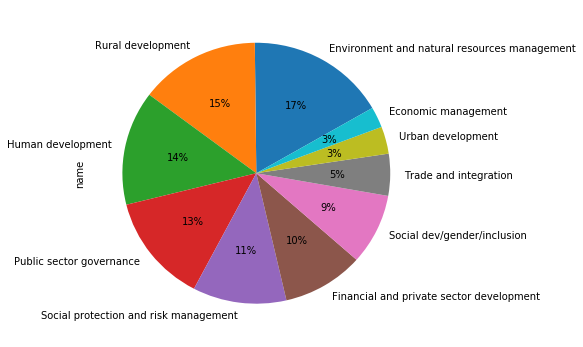

In [9]:
# load json as string and normalize
df_string = json.load(open('data/world_bank_projects.json'))

# normalize on the column of interest, creating columns 'code' and 'name'
nc = json_normalize(df_string, 'mjtheme_namecode')

# backfill empty 'name' values from non-empty values
nc = nc.sort_values(by=['code', 'name']).replace({'': pd.np.NaN}).fillna(method='bfill')

# take the top ten by value, show table and chart
ans2 = nc.name.value_counts().head(10)
print(ans2)
ans2.plot(kind='pie', figsize=(6,6), autopct='%.f%%', startangle=30)

****
#### Steps to Solution - if you'd like to see the steps taken, start here; otherwise skip to [Exercise 3](#Exercise-3) below

The first task is to load the data as a dataframe and inspect it using .info(), .columns(), etc. 

In [10]:
# load json as string and normalize
df_string = json.load(open('data/world_bank_projects.json'))
norm_all = json_normalize(df_string)

print(norm_all.info())
#print(norm_all.columns)
#print(norm_all.describe()) 
#print(norm_all.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 55 columns):
_id.$oid                    500 non-null object
approvalfy                  500 non-null object
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 no

So again let's try the obvious thing and do value_counts().  Ugly.  Needs a little work.

In [11]:
norm_all.mjtheme_namecode.value_counts().head()

[{u'code': u'11', u'name': u'Environment and natural resources management'}, {u'code': u'11', u'name': u'Environment and natural resources management'}]                 12
[{u'code': u'8', u'name': u'Human development'}, {u'code': u'11', u'name': u''}]                                                                                         11
[{u'code': u'8', u'name': u'Human development'}, {u'code': u'8', u'name': u'Human development'}]                                                                          8
[{u'code': u'4', u'name': u'Financial and private sector development'}, {u'code': u'4', u'name': u'Financial and private sector development'}]                            6
[{u'code': u'2', u'name': u'Public sector governance'}, {u'code': u'2', u'name': u'Public sector governance'}, {u'code': u'2', u'name': u'Public sector governance'}]     6
Name: mjtheme_namecode, dtype: int64

*** 
So let's just focus on the 'mjtheme_namecode' column and normalize that.

In [12]:
nc = json_normalize(df_string, 'mjtheme_namecode')
nc.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


*** 
That's cleaner, but has missing values for some of the theme names.  So we'll have to sort, replace the missing values with NaNs, and then backfill the NaNs with the appropriate theme name based on the code.

In [13]:
nc = nc.sort_values(by=['code', 'name']).replace({'': pd.np.NaN}).fillna(method='bfill')
nc.head(15)

,code,name
212,1,Economic management
363,1,Economic management
1024,1,Economic management
1114,1,Economic management
1437,1,Economic management
2,1,Economic management
88,1,Economic management
175,1,Economic management
204,1,Economic management
205,1,Economic management


*** 
That looks better, but how can we be sure that we got everything right?  Let's create a new column that includes both the name and the code.  If there are any name/code combinations that don't match up correctly, we'll be able to spot them with .nunique().

In [14]:
nc['name_plus_code'] = nc['name'] + nc['code']
nc.nunique()

code              11
name              11
name_plus_code    11
dtype: int64

*** 
Since the number of unique name/code combinations is the same as the number of unique codes, we're in good shape.

So our final answer just comes from .value_counts() again.

In [15]:
ans2 = nc.name.value_counts().head(10)

[(Back to top)](#JSON-exercise)

***
## Exercise 3
### In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [16]:
# read the file into a dataframe
s = pd.read_json('data/world_bank_projects.json')

###################### Functions and constants ###################################

def check_blank_theme_names(dataframe):
    """Check for rows with blank theme names in a dataframe. Return the number of them."""
    return len(s[s.mjtheme_namecode.apply(lambda themes: any([d['name'] == '' for d in themes]))])

def add_theme_names(list_of_themes, lookup_table):
    """Find and fill in blank theme names.
    
    Input: a list of dicts from column 'mjtheme_namecode', and a lookup table that's
    a dataframe with 'code' in the row index and 'name' in the column index. This has a very 
    strong code smell -- it's essentially hard-coded because YAGNI and I haven't gotten to 
    three strikes to refactor yet. (That's my excuse anyway.)
    
    Output: nothing is returned - the list of themes is mutated in place.
    """
    
    for d in list_of_themes:
        if d['name'] == '':
            d['name']= lookup_table.loc[str(d['code']), 'name']
    return

# lookup table for names from codes, created from the answer to problem #2 above
lookup_table_mjthemes = nc.groupby('name').max().reset_index().set_index('code')

###################### Processing code ###################################################

# check the number of rows with blank theme names before processing
number_of_blanks_before = check_blank_theme_names(s)
     
# update s in place
s.mjtheme_namecode.apply(lambda themes: add_theme_names(themes, lookup_table_mjthemes))

# check the number of rows with blank theme names after processing
number_of_blanks_after = check_blank_theme_names(s)

print('Processing finished. Number of blank themes prior: ' + str(number_of_blanks_before))
print('Number of blank themes now: ' + str(number_of_blanks_after))

Processing finished. Number of blank themes prior: 122
Number of blank themes now: 0


[(Back to top)](#JSON-exercise)